## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""


Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

W0716 11:20:37.590734 22604 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 11:20:37.663646 22604 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 11:20:37.686462 22604 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.sgd(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0716 11:20:37.947607 22604 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 11:20:37.961960 22604 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0716 11:20:38.122660 22604 deprecation.py:323] From C:\Users\Rosa\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 11:20:38.273444 22604 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 227us/step - loss: 2.2729 - acc: 0.1425 - val_loss: 2.2193 - val_acc: 0.1978
Epoch 2/500
50000/50000 [==============================] - 13s 257us/step - loss: 2.1839 - acc: 0.2114 - val_loss: 2.1514 - val_acc: 0.2384
Epoch 3/500
50000/50000 [==============================] - 11s 223us/step - loss: 2.1245 - acc: 0.2432 - val_loss: 2.0992 - val_acc: 0.2519
Epoch 4/500
50000/50000 [==============================] - 12s 235us/step - loss: 2.0764 - acc: 0.2606 - val_loss: 2.0552 - val_acc: 0.2680
Epoch 5/500
50000/50000 [==============================] - 12s 248us/step - loss: 2.0358 - acc: 0.2765 - val_loss: 2.0194 - val_acc: 0.2822
Epoch 6/500
50000/50000 [==============================] - 10s 205us/step - loss: 2.0030 - acc: 0.2887 - val_loss: 1.9889 - val_acc: 0.2994
Epoch 7/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.9752 - acc: 0.3025 - val_l

Epoch 59/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.6439 - acc: 0.4284 - val_loss: 1.6519 - val_acc: 0.4218
Epoch 60/500
50000/50000 [==============================] - 12s 240us/step - loss: 1.6413 - acc: 0.4290 - val_loss: 1.6472 - val_acc: 0.4250
Epoch 61/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.6379 - acc: 0.4309 - val_loss: 1.6452 - val_acc: 0.4218
Epoch 62/500
50000/50000 [==============================] - 14s 280us/step - loss: 1.6352 - acc: 0.4319 - val_loss: 1.6434 - val_acc: 0.4235
Epoch 63/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.6323 - acc: 0.4321 - val_loss: 1.6399 - val_acc: 0.4254
Epoch 64/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.6291 - acc: 0.4345 - val_loss: 1.6373 - val_acc: 0.4252
Epoch 65/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.6264 - acc: 0.4338 - val_loss: 1.6351 - val_acc: 0.4270
Epoch 66/500


50000/50000 [==============================] - 12s 235us/step - loss: 1.5108 - acc: 0.4736 - val_loss: 1.5364 - val_acc: 0.4578
Epoch 117/500
50000/50000 [==============================] - 10s 210us/step - loss: 1.5089 - acc: 0.4748 - val_loss: 1.5394 - val_acc: 0.4546
Epoch 118/500
50000/50000 [==============================] - 10s 209us/step - loss: 1.5075 - acc: 0.4745 - val_loss: 1.5349 - val_acc: 0.4570
Epoch 119/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.5053 - acc: 0.4759 - val_loss: 1.5381 - val_acc: 0.4564
Epoch 120/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.5035 - acc: 0.4765 - val_loss: 1.5401 - val_acc: 0.4503
Epoch 121/500
50000/50000 [==============================] - 14s 279us/step - loss: 1.5022 - acc: 0.4775 - val_loss: 1.5355 - val_acc: 0.4599
Epoch 122/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.5003 - acc: 0.4769 - val_loss: 1.5302 - val_acc: 0.4626
Epoch 123/500
50000/

50000/50000 [==============================] - 11s 215us/step - loss: 1.4171 - acc: 0.5058 - val_loss: 1.4732 - val_acc: 0.4733
Epoch 174/500
50000/50000 [==============================] - 11s 227us/step - loss: 1.4153 - acc: 0.5060 - val_loss: 1.4753 - val_acc: 0.4726
Epoch 175/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.4140 - acc: 0.5055 - val_loss: 1.4722 - val_acc: 0.4764
Epoch 176/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.4130 - acc: 0.5067 - val_loss: 1.4683 - val_acc: 0.4783
Epoch 177/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.4107 - acc: 0.5074 - val_loss: 1.4737 - val_acc: 0.4775
Epoch 178/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.4095 - acc: 0.5078 - val_loss: 1.4651 - val_acc: 0.4798
Epoch 179/500
50000/50000 [==============================] - 11s 228us/step - loss: 1.4086 - acc: 0.5079 - val_loss: 1.4669 - val_acc: 0.4814
Epoch 180/500
50000/5

50000/50000 [==============================] - 13s 262us/step - loss: 1.3359 - acc: 0.5325 - val_loss: 1.4327 - val_acc: 0.4875
Epoch 231/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.3344 - acc: 0.5335 - val_loss: 1.4166 - val_acc: 0.4941
Epoch 232/500
50000/50000 [==============================] - 12s 242us/step - loss: 1.3334 - acc: 0.5332 - val_loss: 1.4183 - val_acc: 0.4935
Epoch 233/500
50000/50000 [==============================] - 11s 223us/step - loss: 1.3321 - acc: 0.5333 - val_loss: 1.4178 - val_acc: 0.4968
Epoch 234/500
50000/50000 [==============================] - 11s 213us/step - loss: 1.3305 - acc: 0.5338 - val_loss: 1.4208 - val_acc: 0.4982
Epoch 235/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.3296 - acc: 0.5357 - val_loss: 1.4159 - val_acc: 0.4925
Epoch 236/500
50000/50000 [==============================] - 11s 212us/step - loss: 1.3284 - acc: 0.5351 - val_loss: 1.4156 - val_acc: 0.4977
Epoch 237/500
50000/

Epoch 288/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.2616 - acc: 0.5590 - val_loss: 1.3872 - val_acc: 0.5098
Epoch 289/500
50000/50000 [==============================] - 10s 207us/step - loss: 1.2600 - acc: 0.5582 - val_loss: 1.3822 - val_acc: 0.5061
Epoch 290/500
50000/50000 [==============================] - 11s 219us/step - loss: 1.2594 - acc: 0.5604 - val_loss: 1.4047 - val_acc: 0.4980
Epoch 291/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.2586 - acc: 0.5588 - val_loss: 1.3758 - val_acc: 0.5107
Epoch 292/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.2572 - acc: 0.5603 - val_loss: 1.3817 - val_acc: 0.5020
Epoch 293/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.2557 - acc: 0.5602 - val_loss: 1.4037 - val_acc: 0.4996
Epoch 294/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.2543 - acc: 0.5625 - val_loss: 1.3782 - val_acc: 0.5088
Epoch 

Epoch 346/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.1931 - acc: 0.5824 - val_loss: 1.3617 - val_acc: 0.5133
Epoch 347/500
50000/50000 [==============================] - 10s 208us/step - loss: 1.1927 - acc: 0.5838 - val_loss: 1.3522 - val_acc: 0.5167
Epoch 348/500
50000/50000 [==============================] - 10s 209us/step - loss: 1.1916 - acc: 0.5831 - val_loss: 1.3512 - val_acc: 0.5173
Epoch 349/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.1912 - acc: 0.5831 - val_loss: 1.3690 - val_acc: 0.5158
Epoch 350/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.1901 - acc: 0.5844 - val_loss: 1.3597 - val_acc: 0.5138
Epoch 351/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.1879 - acc: 0.5852 - val_loss: 1.3525 - val_acc: 0.5158
Epoch 352/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.1877 - acc: 0.5846 - val_loss: 1.3687 - val_acc: 0.5106
Epoch 

Epoch 404/500
50000/50000 [==============================] - 10s 206us/step - loss: 1.1321 - acc: 0.6040 - val_loss: 1.3646 - val_acc: 0.5143
Epoch 405/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.1297 - acc: 0.6071 - val_loss: 1.3500 - val_acc: 0.5180
Epoch 406/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.1284 - acc: 0.6062 - val_loss: 1.3823 - val_acc: 0.5160
Epoch 407/500
50000/50000 [==============================] - 10s 204us/step - loss: 1.1300 - acc: 0.6061 - val_loss: 1.3360 - val_acc: 0.5204
Epoch 408/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.1262 - acc: 0.6053 - val_loss: 1.3471 - val_acc: 0.5173
Epoch 409/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.1252 - acc: 0.6075 - val_loss: 1.3568 - val_acc: 0.5179
Epoch 410/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.1233 - acc: 0.6086 - val_loss: 1.3506 - val_acc: 0.5241
Epoch 

Epoch 462/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.0713 - acc: 0.6269 - val_loss: 1.3579 - val_acc: 0.5224
Epoch 463/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.0694 - acc: 0.6290 - val_loss: 1.3365 - val_acc: 0.5258
Epoch 464/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.0676 - acc: 0.6280 - val_loss: 1.3452 - val_acc: 0.5264
Epoch 465/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.0664 - acc: 0.6288 - val_loss: 1.3274 - val_acc: 0.5295
Epoch 466/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.0662 - acc: 0.6288 - val_loss: 1.4034 - val_acc: 0.5086
Epoch 467/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.0648 - acc: 0.6295 - val_loss: 1.3256 - val_acc: 0.5284
Epoch 468/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.0622 - acc: 0.6297 - val_loss: 1.3291 - val_acc: 0.5292
Epoch 

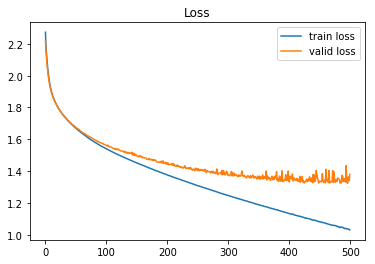

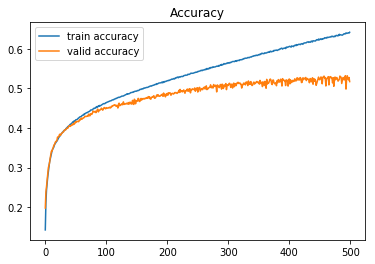

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()